## Read the Data

In [1]:
import pandas as pd
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from matplotlib.cm import get_cmap


In [2]:
# read original Dataset
df = pd.read_csv("../data/life_ladder_gdi_eys_mys.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

In [4]:
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,gdi_year,eys_year,mys_year
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.882,0.414,0.258,0.682,8.630830,1.742754
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.850,0.481,0.237,0.685,8.888430,1.816490
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.707,0.517,0.275,0.684,9.180810,1.890226
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.731,0.480,0.267,0.671,9.473190,1.937043
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.776,0.614,0.268,0.634,9.803687,1.983860


In [5]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'gdi_year', 'eys_year',
       'mys_year'],
      dtype='object')

In [6]:
df.country_name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Ky

### Add Crime_Idx, Health_Care Idx, Cost of living Idx, Pollution Idx

In [7]:
# read Dataset Quality of_life_index
df_Q = pd.read_csv("../data/Quality_of_life_index_2011_2023.csv", delimiter=',')
df_Q.columns = df_Q.columns.str.replace(' ','_')
df_Q.columns = df_Q.columns.str.lower()

In [8]:
# put column 'country' to the first place
columns = df_Q.columns.tolist()
columns.insert(0, columns.pop(columns.index("country")))
df_Q = df_Q.reindex(columns=columns)
df_Q = df_Q.sort_values(by=['country', 'year'])

In [9]:
df_Q.head()

,country,year,quality_of_life_index,purchasing_power_index,crime_index,safety_index,health_care_index,cost_of_living_index,property_price_to_income_ratio,traffic_commute_time_index,pollution_index,climate_index
70,Albania,2023,100.5,31.6,45.6,54.4,49.5,40.8,14.1,36.7,77.0,86.4
929,Argentina,2011,32.6,40.5,48.4,51.6,76.7,68.1,11.8,45.4,90.0,-
871,Argentina,2012,72.5,51.1,59.3,40.7,78.3,69.7,10.2,46.7,55.6,-
799,Argentina,2013,81.1,57.1,57.5,42.5,76.7,66.8,9.0,45.0,57.5,-
724,Argentina,2014,77.0,59.4,62.4,37.6,75.2,67.1,11.6,41.4,55.9,-


In [10]:
df_Q.rename(columns={'country':'country_name'}, inplace=True)
df_Q = df_Q[['country_name', 'year', 'crime_index', 'health_care_index', 'cost_of_living_index', 'pollution_index']]

In [11]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 70 to 75
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_name          945 non-null    object 
 1   year                  945 non-null    int64  
 2   crime_index           945 non-null    float64
 3   health_care_index     945 non-null    float64
 4   cost_of_living_index  945 non-null    float64
 5   pollution_index       945 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.7+ KB


In [12]:
df_Q.country_name.unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Hong Kong', 'Hong Kong (China)', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Netherlands',
       'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Sin

In [13]:
df_Q.query('country_name == "Hong Kong"')

,country_name,year,crime_index,health_care_index,cost_of_living_index,pollution_index
859,Hong Kong,2012,16.6,71.1,76.2,64.9
804,Hong Kong,2013,22.7,71.8,76.4,63.8
721,Hong Kong,2014,19.2,80.6,75.2,59.5
660,Hong Kong,2015,20.8,74.3,81.5,67.2
603,Hong Kong,2016,20.7,68.0,80.0,69.9
539,Hong Kong,2017,20.9,63.8,78.7,69.4
481,Hong Kong,2018,19.3,67.3,78.1,66.4
407,Hong Kong,2019,20.7,66.1,77.2,67.7
326,Hong Kong,2020,21.7,66.3,79.9,67.3
243,Hong Kong,2021,21.9,66.3,80.7,67.6


In [14]:
df_Q.query('country_name == "Hong Kong (China)"')

,country_name,year,crime_index,health_care_index,cost_of_living_index,pollution_index
153,Hong Kong (China),2022,21.5,65.8,75.7,67.2
51,Hong Kong (China),2023,21.8,65.8,71.5,66.9


In [15]:
# rename Hong Kong China to Hong Kong
df_Q['country_name'] = df_Q['country_name'].replace({'Hong Kong (China)': 'Hong Kong'})

In [16]:
df_Q.query('country_name == "Hong Kong"')

,country_name,year,crime_index,health_care_index,cost_of_living_index,pollution_index
859,Hong Kong,2012,16.6,71.1,76.2,64.9
804,Hong Kong,2013,22.7,71.8,76.4,63.8
721,Hong Kong,2014,19.2,80.6,75.2,59.5
660,Hong Kong,2015,20.8,74.3,81.5,67.2
603,Hong Kong,2016,20.7,68.0,80.0,69.9
539,Hong Kong,2017,20.9,63.8,78.7,69.4
481,Hong Kong,2018,19.3,67.3,78.1,66.4
407,Hong Kong,2019,20.7,66.1,77.2,67.7
326,Hong Kong,2020,21.7,66.3,79.9,67.3
243,Hong Kong,2021,21.9,66.3,80.7,67.6


In [17]:
df_Q.query('country_name == "Taiwan"')

,country_name,year,crime_index,health_care_index,cost_of_living_index,pollution_index
853,Taiwan,2012,16.3,81.2,66.8,71.5
787,Taiwan,2013,21.5,78.3,60.2,70.8
715,Taiwan,2014,21.9,84.3,57.1,67.6
577,Taiwan,2016,17.2,81.1,61.4,62.9
512,Taiwan,2017,20.7,82.0,65.4,63.2
460,Taiwan,2018,17.4,86.2,59.8,63.5
373,Taiwan,2019,15.7,86.7,61.4,63.4
290,Taiwan,2020,15.2,86.4,65.2,62.9
205,Taiwan,2021,15.9,86.4,62.4,64.7
29,Taiwan,2023,16.7,86.0,49.0,63.9


In [18]:
df_Q.query('country_name == "Taiwan (China)"')

,country_name,year,crime_index,health_care_index,cost_of_living_index,pollution_index
120,Taiwan (China),2022,16.2,85.9,54.2,64.9


In [19]:
# rename Taiwan (China) to Taiwan
df_Q['country_name'] = df_Q['country_name'].replace({'Taiwan (China)': 'Taiwan'})

In [20]:
df_Q = df_Q.replace(['Hong Kong'],'Hong Kong S.A.R. of China')
df_Q = df_Q.replace(['Taiwan'],'Taiwan Province of China')

In [21]:
#flattening unique values to 1 dimension
lst_df_Q= df_Q.country_name.sort_values().unique().ravel().tolist()
lst_df= df.country_name.sort_values().unique().ravel().tolist()

In [22]:
#looked for excluded to see which ones
def exclusion(lst_df_Q, lst_df):
    lst = [value for value in lst_df_Q if value not in lst_df]
    return lst

print(len(exclusion(lst_df_Q,lst_df)))
for i in exclusion(lst_df_Q,lst_df):
    print(i)

5
China
Hong Kong S.A.R. of China
Oman
Puerto Rico
Turkmenistan


In [23]:
# concatenate df_Q and df
cols_Q = ['country_name', 'year']
happy_Q = df.join(df_Q.set_index(cols_Q), on=cols_Q)

In [24]:
happy_Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

### Add Density

In [25]:
#read Dataset Quality of_life_index
df_D = pd.read_csv("../data/life_ladder_pop_density_merged.txt", delimiter=',')
#df_D.columns = df_Q.columns.str.replace(' ','_')
#df_D.columns = df_Q.columns.str.lower()

In [26]:
df_D.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,population,area_(km²),density_(per_km²)
0,Afghanistan 2008,2008.0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,Asia,26460334.0,652230.0,40.569023
1,Afghanistan 2009,2009.0,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,Asia,27325003.0,652230.0,41.894735
2,Afghanistan 2010,2010.0,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,Asia,28189672.0,652230.0,43.220447
3,Afghanistan 2011,2011.0,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,Asia,29302437.4,652230.0,44.926540
4,Afghanistan 2012,2012.0,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,Asia,30415202.8,652230.0,46.632634


In [27]:
type(df_D.country_name[0])

str

In [28]:

df_D['country_name'] = df_D['country_name'].str.replace(r'\d', '', regex=True) # replacing all the non-digits in the string with nothing

In [29]:
df_D['country_name'] = df_D['country_name'].str.rstrip() #remove the trailing whitespace (on the right)

In [30]:
df_D.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,population,area_(km²),density_(per_km²)
0,Afghanistan,2008.0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,Asia,26460334.0,652230.0,40.569023
1,Afghanistan,2009.0,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,Asia,27325003.0,652230.0,41.894735
2,Afghanistan,2010.0,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,Asia,28189672.0,652230.0,43.220447
3,Afghanistan,2011.0,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,Asia,29302437.4,652230.0,44.926540
4,Afghanistan,2012.0,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,Asia,30415202.8,652230.0,46.632634


In [31]:
df_D = df_D[['country_name', 'year', 'density_(per_km²)']]

In [32]:
# concatenate df_D and happy_Q
cols_D = ['country_name', 'year']
happy_Q_D = happy_Q.join(df_D.set_index(cols_D), on=cols_D)

In [33]:
happy_Q_D.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,gdi_year,eys_year,mys_year,crime_index,health_care_index,cost_of_living_index,pollution_index,density_(per_km²)
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.882,0.414,0.258,0.682,8.630830,1.742754,NaN,NaN,NaN,NaN,40.569023
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.850,0.481,0.237,0.685,8.888430,1.816490,NaN,NaN,NaN,NaN,41.894735
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.707,0.517,0.275,0.684,9.180810,1.890226,NaN,NaN,NaN,NaN,43.220447
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.731,0.480,0.267,0.671,9.473190,1.937043,NaN,NaN,NaN,NaN,44.926540
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.776,0.614,0.268,0.634,9.803687,1.983860,NaN,NaN,NaN,NaN,46.632634


In [34]:
happy_Q_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

### Add GINI Index

In [35]:
# read Dataset
df_Gini = pd.read_csv("../data/Chapter2OnlineData.txt", delimiter=',')

In [36]:
df_Gini.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [37]:
# pick only certain columns in data frame
df_Gini = df_Gini[['Country name', 'Year',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year']]

In [38]:
df_Gini.columns = df_Gini.columns.str.lower()
df_Gini.columns = df_Gini.columns.str.replace(' ','_')
df_Gini.rename(columns={'gini_index_(world_bank_estimate),_average_2000-16':'gini_idx_WB', 'gini_of_household_income_reported_in_gallup,_by_wp5-year':'gini_gallup'}, inplace=True)

In [39]:
df_Gini.country_name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [40]:
#flattening unique values to 1 dimension
lst_df_Gini= df_Gini.country_name.sort_values().unique().ravel().tolist()
lst_happy_Q_D= happy_Q_D.country_name.sort_values().unique().ravel().tolist()

In [41]:
#looked for excluded to see which ones
def exclusion(lst_df_Gini, lst_happy_Q_D):
    lst = [value for value in lst_df_Gini if value not in lst_happy_Q_D]
    return lst

print(len(exclusion(lst_df_Gini,lst_happy_Q_D)))
for i in exclusion(lst_df_Gini,lst_happy_Q_D):
    print(i)

14
China
Cuba
Czech Republic
Hong Kong S.A.R. of China
Kosovo
Macedonia
North Cyprus
Oman
Palestinian Territories
Somaliland region
South Sudan
Swaziland
Turkey
Turkmenistan


In [42]:
# change some country's names
df_Gini['country_name'] = df_Gini['country_name'].replace({'Czech Republic': 'Czechia'})
df_Gini['country_name'] = df_Gini['country_name'].replace({'Macedonia': 'North Macedonia'})
df_Gini['country_name'] = df_Gini['country_name'].replace({'Palestinian Territories': 'State of Palestine'})
df_Gini['country_name'] = df_Gini['country_name'].replace({'Swaziland': 'Eswatini'})
df_Gini['country_name'] = df_Gini['country_name'].replace({'Turkey': 'Turkiye'})

In [43]:
# concatenate df_Gini and happy_Q_D
cols_Gini = ['country_name', 'year']
happy_Q_D_G = happy_Q_D.join(df_Gini.set_index(cols_Gini), on=cols_Gini)

In [44]:
happy_Q_D_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

In [45]:
happy_Q_D_G.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'gdi_year', 'eys_year',
       'mys_year', 'crime_index', 'health_care_index', 'cost_of_living_index',
       'pollution_index', 'density_(per_km²)', 'gini_idx_WB', 'gini_gallup'],
      dtype='object')

### Correlation to life_ladder

In [46]:
selected_features = ['life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect',
       'mys_year', 
       'crime_index', 'health_care_index', 'cost_of_living_index', 'pollution_index', 
       'density_(per_km²)', 
       #'gini_idx_WB', 
       'gini_gallup']

corr_mtrx = round(happy_Q_D_G[selected_features].corr(), 4)
corr_mtrx

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,mys_year,crime_index,health_care_index,cost_of_living_index,pollution_index,density_(per_km²),gini_gallup
life_ladder,1.0000,0.7884,0.7253,0.7250,0.5341,-0.4486,0.5125,-0.3386,0.6555,-0.2737,0.5114,0.6396,-0.6638,0.0764,-0.3227
log_gdp_per_capita,0.7884,1.0000,0.6972,0.8322,0.3573,-0.3480,0.2323,-0.2579,0.8366,-0.5056,0.4612,0.7053,-0.7333,0.1606,-0.4387
social_support,0.7253,0.6972,1.0000,0.6034,0.4065,-0.2250,0.4370,-0.4507,0.6576,-0.2310,0.3600,0.4759,-0.6064,0.0214,-0.3258
healthy_life_expectancy_at_birth,0.7250,0.8322,0.6034,1.0000,0.3677,-0.3015,0.2205,-0.1396,0.7379,-0.5528,0.4850,0.5903,-0.5872,0.1443,-0.4757
freedom_to_make_life_choices,0.5341,0.3573,0.4065,0.3677,1.0000,-0.4811,0.5887,-0.2736,0.3193,-0.1579,0.4164,0.3123,-0.4502,0.0825,0.1032
perceptions_of_corruption,-0.4486,-0.3480,-0.2250,-0.3015,-0.4811,1.0000,-0.2954,0.2744,-0.2773,0.2683,-0.4044,-0.5980,0.5857,-0.2893,-0.0303
positive_affect,0.5125,0.2323,0.4370,0.2205,0.5887,-0.2954,1.0000,-0.3322,0.1249,0.0910,0.4304,0.3568,-0.3892,-0.0357,0.1766
negative_affect,-0.3386,-0.2579,-0.4507,-0.1396,-0.2736,0.2744,-0.3322,1.0000,-0.2938,0.2847,-0.2760,-0.3652,0.4393,-0.0916,0.1687
mys_year,0.6555,0.8366,0.6576,0.7379,0.3193,-0.2773,0.1249,-0.2938,1.0000,-0.5099,0.2959,0.5084,-0.6737,0.0673,-0.4185
crime_index,-0.2737,-0.5056,-0.2310,-0.5528,-0.1579,0.2683,0.0910,0.2847,-0.5099,1.0000,-0.3496,-0.3128,0.4888,-0.1939,0.2425


## Color Map

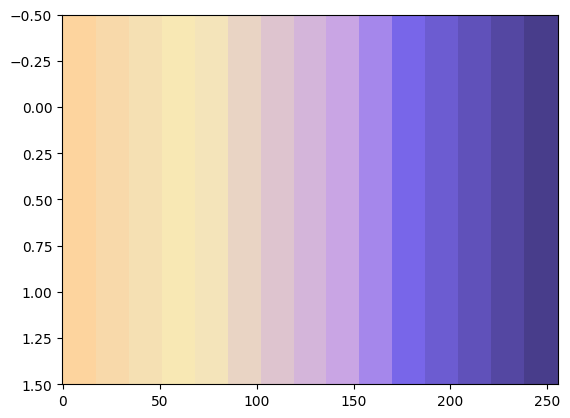

In [47]:
# changed color map!
ccolors = [(0, "#fdd49e"), (0.125, "wheat"), (0.25, "#faecb5"), (0.6, "#c59fe9"), (0.7, "mediumslateblue"),  (0.8, "slateblue"), (1, "darkslateblue")] # (0.5, "thistle"), (0.375, "lightyellow"),
col_cap = colors.LinearSegmentedColormap.from_list("", ccolors, N=len(corr_mtrx), gamma=1.0)
sns.set_palette(col_cap(np.linspace(0,1,col_cap.N)))



gradient = np.linspace(0.0, 1.0, 256)
gradient = np.vstack((gradient, gradient))

plt.imshow(gradient, aspect="auto", cmap=col_cap)
plt.show()

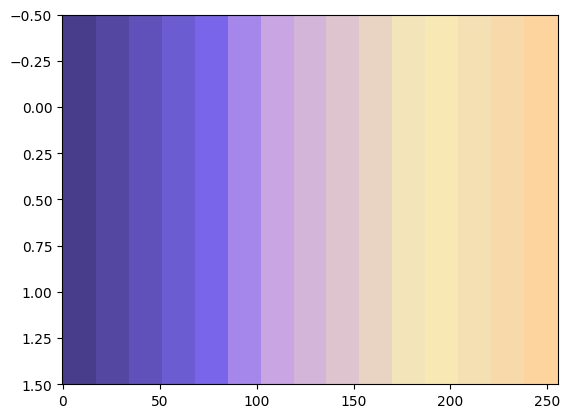

In [48]:
# create reversing colormap
col_cap_r = col_cap.reversed()
plt.imshow(gradient, aspect="auto", cmap=col_cap_r)
plt.show()

#### Correlation

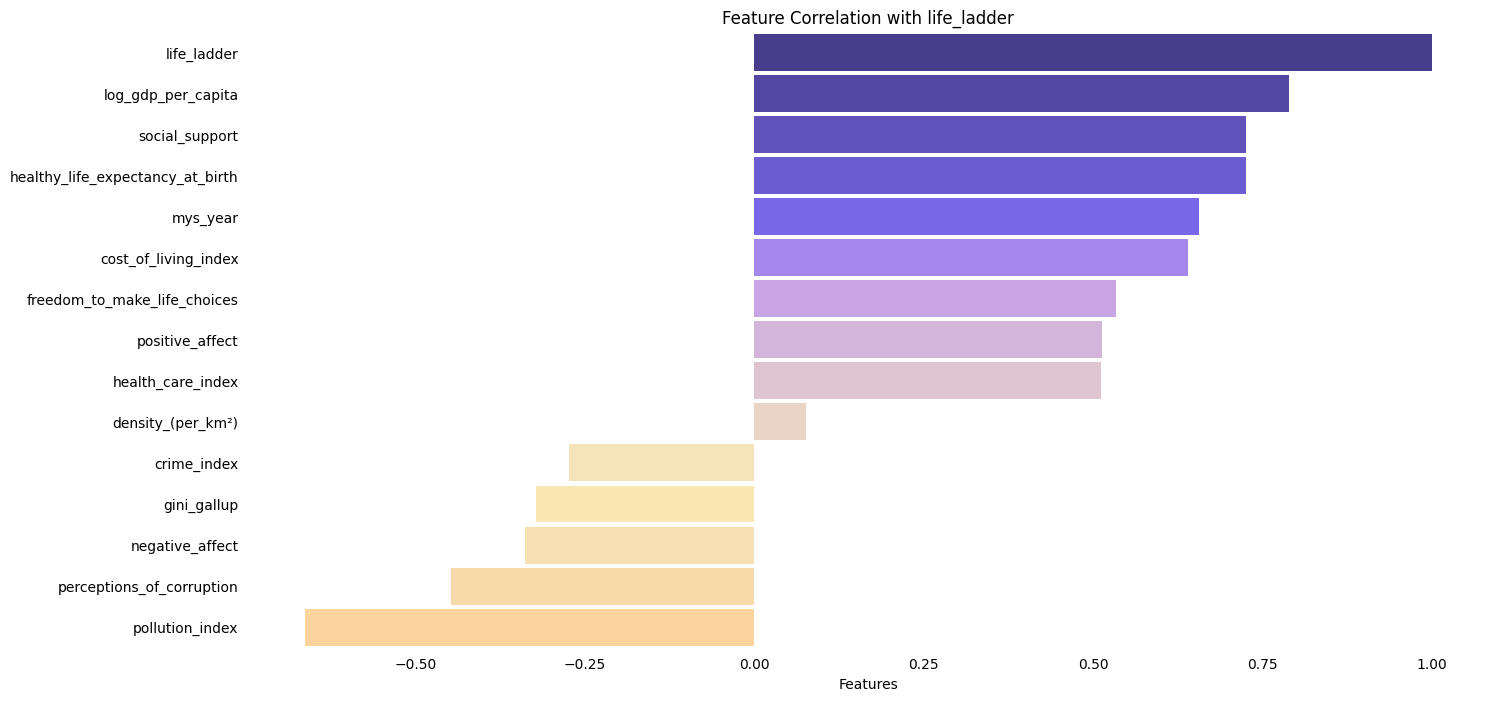

In [49]:
# Plotting
plt.figure(figsize=(16, 8))
ax = sns.barplot(y=corr_mtrx['life_ladder'].sort_values(ascending=False).index,
            x=corr_mtrx['life_ladder'].sort_values(ascending=False),
            palette=col_cap_r(np.linspace(0, 1, col_cap_r.N)),
            saturation = 1.,
            width = 0.9)
            #palette=col_cap)
            #orient='h')
plt.title('Feature Correlation with life_ladder')
plt.xlabel('Features')

#ax.set(xticklabels=[]) # remove tick labels
ax.tick_params(bottom=False) #remove the ticks

#ax.set(yticklabels=[]) # remove tick labels
ax.tick_params(left=False) #remove the ticks

#plt.ylabel('Correlation Coefficient')
#plt.xticks(rotation=45, ha="right")
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False);
plt.show()